In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

df = pd.read_csv("FuelConsumption.csv") # Load dataset
df.head() # Peek into the dataset

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230


In [ ]:
df.describe()

,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,639.0,639.000000,639.000000,639.000000,639.000000
mean,2000.0,3.265728,5.805947,14.713615,296.809077
std,0.0,1.231012,1.625588,3.307044,65.504178
min,2000.0,1.000000,3.000000,4.900000,104.000000
25%,2000.0,2.200000,4.000000,12.500000,253.000000
50%,2000.0,3.000000,6.000000,14.400000,288.000000
75%,2000.0,4.300000,6.000000,16.600000,343.000000
max,2000.0,8.000000,12.000000,30.200000,582.000000


In [ ]:
df.columns

Index(['Year', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS '],
      dtype='object')

In [ ]:
cdf = df[['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'COEMISSIONS ']]
cdf.head()

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
0,1.6,4,10.5,216
1,1.6,4,9.8,205
2,3.2,6,13.7,265
3,3.5,6,15.0,301
4,1.8,4,11.4,230


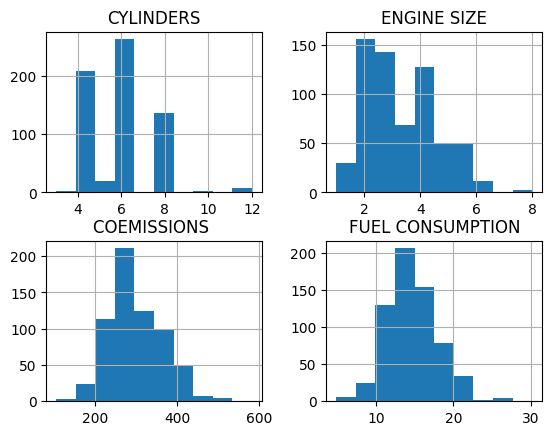

In [ ]:
viz = cdf[['CYLINDERS', 'ENGINE SIZE', 'COEMISSIONS ', 'FUEL CONSUMPTION']]
viz.hist()
plt.show()

Show the relationship between fuel consumption and coemissions

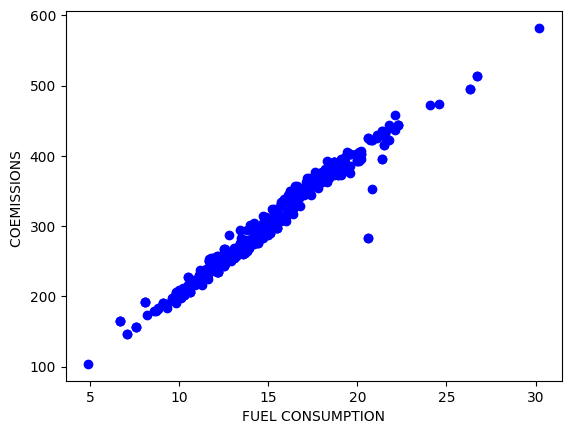

In [ ]:
plt.scatter(cdf['FUEL CONSUMPTION'], cdf['COEMISSIONS '], color='blue')
plt.xlabel("FUEL CONSUMPTION")
plt.ylabel("COEMISSIONS ")
plt.show()

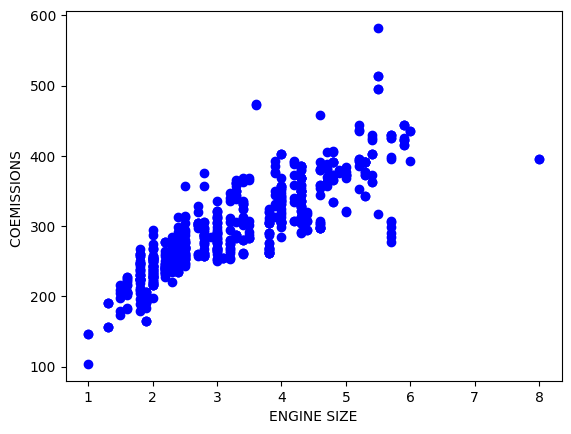

In [ ]:
plt.scatter(cdf['ENGINE SIZE'], cdf['COEMISSIONS '], color='blue')
plt.xlabel("ENGINE SIZE")
plt.ylabel("COEMISSIONS ")
plt.show()

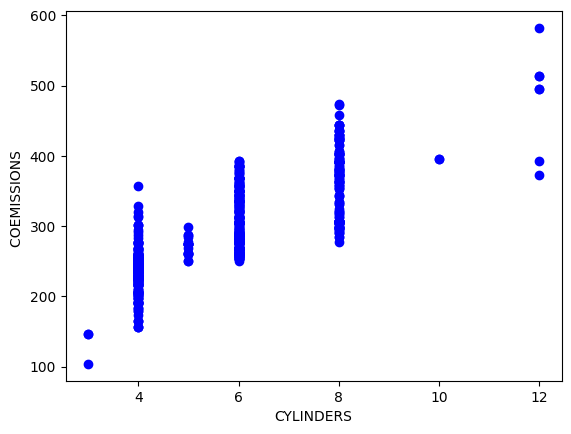

In [ ]:
plt.scatter(cdf.CYLINDERS, cdf['COEMISSIONS '], color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("COEMISSIONS ")
plt.show()

Split data. 80% training set; 20% testing set.
We create a mask to select random rows.

In [ ]:
msk = np.random.rand(len(df)) < 0.8

In [ ]:
msk

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
       False, False,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True, False,  True, False, False,  True, False, False,
        True,  True,

In [ ]:
len(msk)

639

In [ ]:
count = 0
for a in range(len(msk)):
  if (msk[a] == True):
    count = count + 1
print(count)

502


In [ ]:
train = cdf[msk]
test = cdf[~msk]

In [ ]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['ENGINE SIZE']])
train_y = np.asanyarray(train[['COEMISSIONS ']])

regr.fit(train_x, train_y)

print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[45.46818106]]
Intercept:  [148.81252919]


Text(0, 0.5, 'Emission')

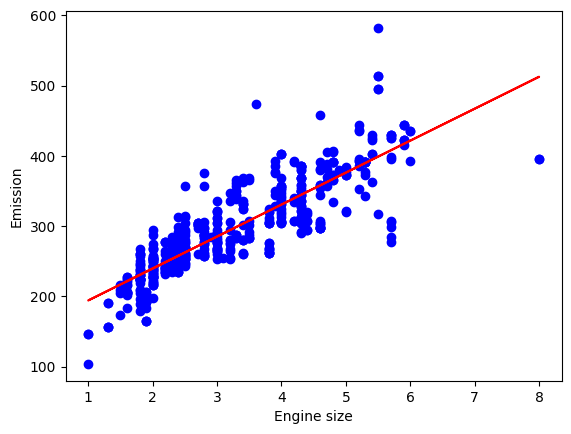

In [ ]:
plt.scatter(train['ENGINE SIZE'], train['COEMISSIONS '],  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")